In [1]:
import random
import numpy as np
import os
import glob
import cv2

In [2]:
def resize(path, img_height, img_width):
    img = cv2.imread(path)
    resized = cv2.resize(img, (img_height, img_width))
    return resized

In [3]:
PATH = 'C:/Users/Vedant/Desktop/ML_Assignment_201701076/Driver Distraction Problem/imgs/train'

In [4]:
def get_data(PATH):
    train_dir = PATH
    X_train = []
    y_train = []
    
    for j in range(10):
        print('Load folder c{}'.format(j))
        path = os.path.join(train_dir, 'c' + str(j), '*.jpg')
        files = glob.glob(path)
        for fl in files:
            flbase = os.path.basename(fl)
            img = resize(fl, 64, 64)
            X_train.append(img)
            y_train.append(j)
    return X_train, y_train

In [6]:
X_train, y = get_data(PATH)

Load folder c0
Load folder c1
Load folder c2
Load folder c3
Load folder c4
Load folder c5
Load folder c6
Load folder c7
Load folder c8
Load folder c9


In [7]:
X_train = np.asarray(X_train)
y = np.asarray(y)
print(X_train.shape)

(22424, 64, 64, 3)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y, test_size=0.2, random_state=42)

In [9]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)

Training data shape:  (17939, 12288)
Validation data shape:  (4485, 12288)


In [10]:
from linear_classifier import LinearSVM

learning_rates = [9e-9, 1e-8, 8e-9]
regularization_strengths = [9e4, 7e4, 8e4]

results = {}
best_val = -1   
best_svm = None 

for lr in learning_rates:
    for reg in regularization_strengths:
        linearSVM = LinearSVM()
        linearSVM.train(X_train, y_train, learning_rate =lr, reg=reg, num_iters=1500, verbose=False)
        y_train_pred = linearSVM.predict(X_train)
        y_val_pred = linearSVM.predict(X_val)
        train_accuracy = np.mean(y_train == y_train_pred)
        val_accuracy = np.mean(y_val == y_val_pred)
        results[(lr, reg)] = (train_accuracy, val_accuracy)
        if val_accuracy > best_val:
            best_val = val_accuracy
            best_svm = linearSVM
        
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

lr 8.000000e-09 reg 7.000000e+04 train accuracy: 0.539383 val accuracy: 0.521516
lr 8.000000e-09 reg 8.000000e+04 train accuracy: 0.600256 val accuracy: 0.577703
lr 8.000000e-09 reg 9.000000e+04 train accuracy: 0.638776 val accuracy: 0.621405
lr 9.000000e-09 reg 7.000000e+04 train accuracy: 0.613747 val accuracy: 0.594649
lr 9.000000e-09 reg 8.000000e+04 train accuracy: 0.650482 val accuracy: 0.635229
lr 9.000000e-09 reg 9.000000e+04 train accuracy: 0.688556 val accuracy: 0.671349
lr 1.000000e-08 reg 7.000000e+04 train accuracy: 0.665366 val accuracy: 0.647938
lr 1.000000e-08 reg 8.000000e+04 train accuracy: 0.716707 val accuracy: 0.699220
lr 1.000000e-08 reg 9.000000e+04 train accuracy: 0.728246 val accuracy: 0.713935
best validation accuracy achieved during cross-validation: 0.713935


In [11]:
import matplotlib.pyplot as plt
linearSVM = LinearSVM()
loss_hist = linearSVM.train(X_train, y_train, learning_rate =1e-8, reg=9e4, num_iters=1500, verbose=True)
y_train_pred = linearSVM.predict(X_train)
y_val_pred = linearSVM.predict(X_val)
train_accuracy = np.mean(y_train == y_train_pred)
val_accuracy = np.mean(y_val == y_val_pred)
print('train accuracy: %f val accuracy: %f' % (train_accuracy, val_accuracy))

iteration 0 / 1500: loss 11145.865039
iteration 100 / 1500: loss 7750.145955
iteration 200 / 1500: loss 5400.788047
iteration 300 / 1500: loss 3767.183028
iteration 400 / 1500: loss 2625.839675
iteration 500 / 1500: loss 1831.718640
iteration 600 / 1500: loss 1277.938181
iteration 700 / 1500: loss 891.324813
iteration 800 / 1500: loss 622.656304
iteration 900 / 1500: loss 434.780359
iteration 1000 / 1500: loss 304.165199
iteration 1100 / 1500: loss 212.990656
iteration 1200 / 1500: loss 149.911440
iteration 1300 / 1500: loss 105.460626
iteration 1400 / 1500: loss 74.255008
train accuracy: 0.728246 val accuracy: 0.713935


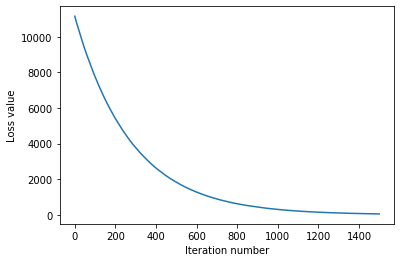

In [12]:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.savefig("loss.jpg")